In [13]:
!pip install chama

In [14]:
import numpy as np
import pandas as pd
import chama

In [15]:
#signal data read
df = pd.read_csv('data1.csv')
signal = pd.DataFrame(data=df)
signal

,X,Y,Z,T,S1,S2,S3
0,1,1,1,0,0.00,0.00,0.00
1,1,1,1,10,0.00,0.00,0.01
2,1,1,1,20,0.00,0.00,0.00
3,1,1,1,30,0.00,0.55,0.65
4,2,1,1,0,0.25,0.21,0.20
5,2,1,1,10,0.32,0.14,0.25
6,2,1,1,20,0.45,0.58,0.61
7,2,1,1,30,0.65,0.42,0.95
8,1,2,1,0,0.23,0.47,0.32
9,1,2,1,10,0.64,0.12,0.15


In [50]:
pos1 = chama.sensors.Stationary(location=(2,2,1))
det1 = chama.sensors.Point(threshold=0.001, sample_times=list(signal["T"].unique()))
stationary_pt_sensor = chama.sensors.Sensor(position=pos1, detector=det1)

In [51]:
pos2 = chama.sensors.Mobile(locations=[(0,0,0),(1,0,0),(1,3,0),(1,2,1)],speed=1.2)
det2 = chama.sensors.Point(threshold=0.001, sample_times=[0,10,20])
mobile_pt_sensor = chama.sensors.Sensor(position=pos2, detector=det2)

In [52]:
pos3 = chama.sensors.Stationary(location=(2,2,1))
det3 = chama.sensors.Camera(threshold=400, sample_times=list(signal["T"].unique()), direction=(1,1,1))
stationary_camera_sensor = chama.sensors.Sensor(position=pos3, detector=det3)

In [53]:
pos4 = chama.sensors.Mobile(locations=[(0,1,1),(0.1,1.2,1),(1,3,0),(1,2,1)],speed=0.5)
det4 = chama.sensors.Camera(threshold=100, sample_times=[0,10,20], direction=(1,1,1))
mobile_camera_sensor = chama.sensors.Sensor(position=pos4, detector=det4)

In [54]:
x_grid = np.linspace(-100, 100, 21)
y_grid = np.linspace(-100, 100, 21)
z_grid = np.linspace(0, 40, 21)
grid = chama.simulation.Grid(x_grid, y_grid, z_grid)
source = chama.simulation.Source(-20, 20, 1, 1.5)



In [55]:
#signal = pd.DataFrame(data=signal1)
print(signal.head( ))
#print(signal.head(5))

   X  Y  Z   T    S1    S2    S3
0  1  1  1   0  0.00  0.00  0.00
1  1  1  1  10  0.00  0.00  0.01
2  1  1  1  20  0.00  0.00  0.00
3  1  1  1  30  0.00  0.55  0.65
4  2  1  1   0  0.25  0.21  0.20


In [56]:
sensors = dict()
sensors['A'] = stationary_pt_sensor
sensors['B'] = mobile_pt_sensor
sensors['C'] = stationary_camera_sensor
sensors['D'] = mobile_camera_sensor

In [57]:
#test extraxt detection time
det_times = chama.impact.extract_detection_times(signal, sensors, interp_method=None, min_distance=30.0)

In [58]:
#print(det_times)
det_times

,Scenario,Sensor,Detection Times
0,S1,A,"[0, 10, 20, 30]"
1,S1,C,"[0, 10, 20, 30]"
2,S2,A,"[0, 10, 20, 30]"
3,S2,C,[10]
4,S3,A,"[0, 10, 20, 30]"
5,S3,C,"[0, 10, 30]"


In [59]:
>>> det_time_stats = chama.impact.detection_time_stats(det_times)
>>> print(det_time_stats)

  Scenario Sensor  Min       Mean  Median  Max  Count
0       S1      A    0  15.000000    15.0   30      4
1       S1      C    0  15.000000    15.0   30      4
2       S2      A    0  15.000000    15.0   30      4
3       S2      C   10  10.000000    10.0   10      1
4       S3      A    0  15.000000    15.0   30      4
5       S3      C    0  13.333333    10.0   30      3


In [60]:
>>> min_det_time = det_time_stats[['Scenario','Sensor','Min']]
>>> min_det_time = min_det_time.rename(columns={'Min':'Impact'})
>>> print(min_det_time)

  Scenario Sensor  Impact
0       S1      A       0
1       S1      C       0
2       S2      A       0
3       S2      C      10
4       S3      A       0
5       S3      C       0


In [61]:
>>> det_time = min_det_time.rename(columns={'Impact':'T'}, inplace=False)
>>> print(det_time)

  Scenario Sensor   T
0       S1      A   0
1       S1      C   0
2       S2      A   0
3       S2      C  10
4       S3      A   0
5       S3      C   0


In [62]:
df = pd.read_csv('impact_cost.csv')
impact_cost  = pd.DataFrame(data=df)
impact_cost

,T,S1,S2,S3
0,0,0,0,0
1,10,10000,5000,15000
2,20,40000,20000,50000
3,30,80000,75000,95000
4,40,100000,90000,150000


In [63]:
>>> impact_metric = chama.impact.detection_time_to_impact(det_time, impact_cost)
>>> print(impact_metric)

  Scenario Sensor  Impact
0       S1      A       0
1       S1      C       0
2       S2      A       0
3       S2      C    5000
4       S3      A       0
5       S3      C       0


C:\Users\evladmin\anaconda3\lib\site-packages\chama\impact.py:156: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  det_damage['T'] = impact_data.lookup(detection_time['T'],


In [64]:
>>> print(det_times)

  Scenario Sensor  Detection Times
0       S1      A  [0, 10, 20, 30]
1       S1      C  [0, 10, 20, 30]
2       S2      A  [0, 10, 20, 30]
3       S2      C             [10]
4       S3      A  [0, 10, 20, 30]
5       S3      C      [0, 10, 30]


In [65]:
>>> scenario_cov = chama.impact.detection_times_to_coverage(det_times, coverage_type='scenario')
>>> print(scenario_cov)

  Sensor      Coverage
0      A  [S1, S2, S3]
1      C  [S1, S2, S3]


In [66]:
>>> print(min_det_time)

  Scenario Sensor  Impact
0       S1      A       0
1       S1      C       0
2       S2      A       0
3       S2      C      10
4       S3      A       0
5       S3      C       0


In [67]:
>>> scenario_cov = chama.impact.impact_to_coverage(min_det_time)
>>> print(scenario_cov)

  Sensor      Coverage
0      A  [S1, S2, S3]
1      C  [S1, S2, S3]


In [68]:
#calculate optimization
print(min_det_time)

  Scenario Sensor  Impact
0       S1      A       0
1       S1      C       0
2       S2      A       0
3       S2      C      10
4       S3      A       0
5       S3      C       0


In [69]:
df = pd.read_csv('sensor.csv')
sensor  = pd.DataFrame(data=df)
sensor

,Sensor,Cost
0,A,100
1,B,200
2,C,400
3,D,500


In [70]:
df = pd.read_csv('scenario.csv')
scenario  = pd.DataFrame(data=df)
scenario

,Scenario,Undetected Impact,Probability
0,S1,50,0.15
1,S2,250,0.50
2,S3,100,0.05
3,S4,75,0.20
4,S5,225,0.10


In [71]:
>>> impactform = chama.optimize.ImpactFormulation()

In [85]:
results = impactform.solve(impact=min_det_time, sensor_budget=1000, 
                           sensor=sensor, scenario=scenario, 
                           use_scenario_probability=True, use_sensor_cost=True)

In [86]:
print(results['Sensors'])

['A']


In [74]:
print(results['Objective'])

37.5


In [75]:
print(results['Assessment'])

  Scenario Sensor  Impact
0       S1      A       0
1       S2      A       0
2       S3      A       0
3       S4   None      75
4       S5   None     225


C:\Users\evladmin\anaconda3\lib\site-packages\chama\graphics.py:98: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


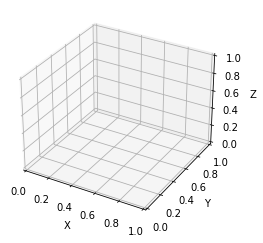

In [87]:
chama.graphics.signal_convexhull(signal, scenarios=['S1', 'S2', 'S3'], threshold=0.0)

C:\Users\evladmin\anaconda3\lib\site-packages\chama\graphics.py:234: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


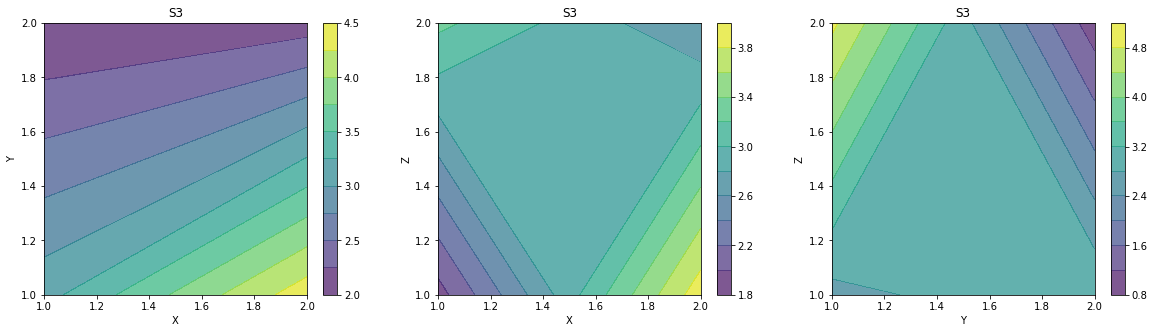

In [88]:
chama.graphics.signal_xsection(signal, 'S3', threshold=0.01)

C:\Users\evladmin\anaconda3\lib\site-packages\chama\graphics.py:399: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


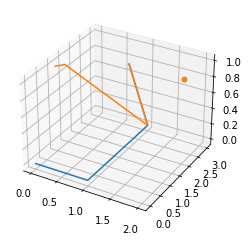

In [79]:
chama.graphics.sensor_locations(sensors)

In [80]:
print(results['Assessment'])

  Scenario Sensor  Impact
0       S1      A       0
1       S2      A       0
2       S3      A       0
3       S4   None      75
4       S5   None     225


<AxesSubplot:>

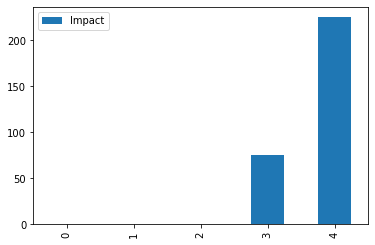

In [81]:
results['Assessment'].plot(kind='bar')